# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv(r'Notebooks Data Process/3. Feature_Engineered.csv').drop(columns=['RegisterTime' , 'ExpirationDate','BizIsExpired?'])
del df['#Cases']
del df['#Activities']
df.head()

,BizDomainId,WarningSign,ActiveUsers/AddedUsers,Pending/Whole_TransSpeed,CasesRatio,ActivitiesRatio,Delay_Lag/Whole
0,28710004-7957-4cae-8528-2e45bd62bbe9,0.0,0.000000,0.0,0.0,0.0,0.0
1,1374a992-1317-4bd8-8129-874374a25f2b,0.0,0.375000,0.0,0.0,0.0,0.0
2,e522f481-9224-47d1-b248-ab00983cd1a3,0.0,0.320833,0.0,0.0,0.0,0.0
3,d7b7b402-47a7-40df-bf26-65a5b5fdcb16,0.0,0.000000,0.0,0.0,0.0,0.0
4,a4a3f452-aa6d-4474-b032-82915f6fd267,0.0,0.181818,0.0,0.0,0.0,1.0


# Calculating weights

In [3]:
from pymcdm.weights import entropy_weights, merec_weights, critic_weights, cilos_weights, idocriw_weights, angle_weights, gini_weights, standard_deviation_weights, variance_weights

# Entropy-Sahnon
weights_entropy = entropy_weights(df.iloc[: , 1:].to_numpy()+0.00001)

# MEREC
weights_merec = merec_weights(df.iloc[: , 1:].to_numpy()+0.00001, types=np.array([1,1,1,1,1,1]))

# CRITIC
weights_critic = critic_weights(df.iloc[: , 1:].to_numpy())

# CILOS
weights_cilos = cilos_weights(df.iloc[: , 1:].to_numpy() , types=np.array([1,1,1,1,1,1]))

# IDOCRIW
weights_idocriw = idocriw_weights(df.iloc[: , 1:].to_numpy() , types=np.array([1,1,1,1,1,1]))

# ANGLE
weights_angle = angle_weights(df.iloc[: , 1:].to_numpy())

# Gini
weights_gini = gini_weights(df.iloc[: , 1:].to_numpy())

# std
weights_std = standard_deviation_weights(df.iloc[: , 1:].to_numpy())

# var
weights_var = variance_weights(df.iloc[: , 1:].to_numpy())

# Deal
df_weights = pd.DataFrame({'Entropy': weights_entropy,'MEREC': weights_merec , 'CRITIC':weights_critic ,
                            'CILOS': weights_cilos , 'IDOCRIW':weights_idocriw , 'ANGLE':weights_angle,
                            'GINI':weights_gini , 'std':weights_std , 'var':weights_var},
                            index = df.iloc[:,1:].columns)
df_weights

,Entropy,MEREC,CRITIC,CILOS,IDOCRIW,ANGLE,GINI,std,var,Deal_weights
WarningSign,0.289203,0.016644,0.093012,0.039321,0.039321,0.215030,0.215880,0.086455,0.039098,0.162694
ActiveUsers/AddedUsers,0.037007,0.512805,0.222325,0.412806,0.412806,0.102893,0.097438,0.211976,0.235044,0.216827
Pending/Whole_TransSpeed,0.280538,0.017397,0.105422,0.060068,0.060068,0.212936,0.214755,0.097489,0.049716,0.102722
CasesRatio,0.247121,0.023601,0.134890,0.034406,0.034406,0.205036,0.209418,0.135206,0.095624,0.285500
ActivitiesRatio,0.087525,0.185722,0.205995,0.094182,0.094182,0.145693,0.150564,0.211446,0.233870,0.232257
Delay_Lag/Whole,0.058606,0.243831,0.238355,0.359217,0.359217,0.118411,0.111945,0.257429,0.346649,0.000000


- MEREC algorithm is the newest algorithm developed and it is applicable in many areas.
- ANGLE was proposed in 2012 and it has not come in handy and was cited only by 5 papers.
- CILOS is used on Logistics.
- GINI is sued in measuring wealth and in economics.
- CRITIC is mostly used when the features are independent.


# Distribution of features

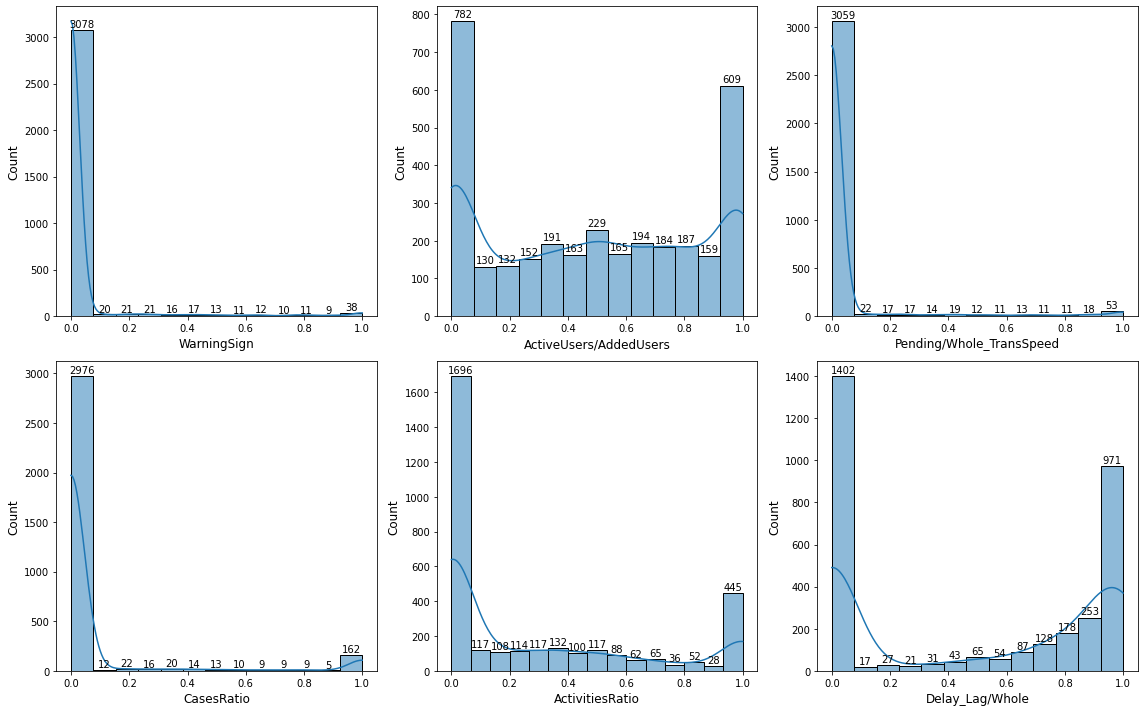

In [4]:
# Plotting the histograms and KDE plots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
axs = axs.flatten()
for i, feature in enumerate(df.iloc[: , 1:].columns):
    sns.histplot(data=df, x=feature, kde=True, ax=axs[i])
    axs[i].set_xlabel(feature, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)

    # Adding the number of datapoints to each bar of the histogram
    for rect in axs[i].patches:
        height = rect.get_height()
        axs[i].text(rect.get_x() + rect.get_width() / 2, height+5, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Health Score

In [5]:
best = [1 , 1 , 1 , 1 , 1 , 1]
df['Health_Score'] = np.around(1 - df.iloc[:,1:].apply(lambda x: euclidean(x , best , weights_deal) , axis=1),decimals=4)*10
# df['Health_Score_GINI'] = np.around(1 - df.iloc[:,1:7].apply(lambda x: euclidean(x , best , weights_gini) , axis=1),decimals=4)*10

df.head()

,BizDomainId,WarningSign,ActiveUsers/AddedUsers,Pending/Whole_TransSpeed,CasesRatio,ActivitiesRatio,Delay_Lag/Whole,Health_Score
0,28710004-7957-4cae-8528-2e45bd62bbe9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
1,1374a992-1317-4bd8-8129-874374a25f2b,0.0,0.375000,0.0,0.0,0.0,0.0,0.684
2,e522f481-9224-47d1-b248-ab00983cd1a3,0.0,0.320833,0.0,0.0,0.0,0.0,0.602
3,d7b7b402-47a7-40df-bf26-65a5b5fdcb16,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
4,a4a3f452-aa6d-4474-b032-82915f6fd267,0.0,0.181818,0.0,0.0,0.0,1.0,0.365


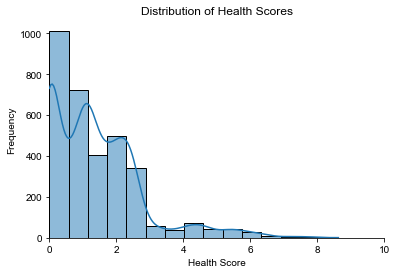

In [6]:
sns.histplot(df['Health_Score'], kde=True ,bins=15)
# sns.set_style('whitegrid')
sns.despine(left=True)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlim(0,10)
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Distribution of Health Scores')
plt.show()
